## Objectives/Questions to be addressed through project

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. How does Infant and Adult mortality rates affect life expectancy?
3. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
4. What is the impact of schooling on the lifespan of humans?
5. Does Life Expectancy have positive or negative relationship with drinking alcohol?
6. Do densely populated countries tend to have lower life expectancy?
7. What is the impact of Immunization coverage on life Expectancy?

# MULTIPLE LINEAR REGRESSION

### import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### import dataset

In [3]:
data=pd.read_csv("C:\\Users\\shash\\Desktop\\Machine Learning A-Z (Codes and Datasets)\\Datasets for projects\\Life Expectancy Data.csv")

In [4]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.shape[1]

22

In [5]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

#### Immunization factors: 'Hepatitis B', 'Polio', ' Diphtheria'

In [6]:
features=[ 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### data preprocessing

In [9]:
data.fillna(data.mean(), inplace = True)

In [10]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### data visualization

#### visualization of normal and pdf curve of life expectancy

<AxesSubplot:xlabel='Life expectancy ', ylabel='Density'>

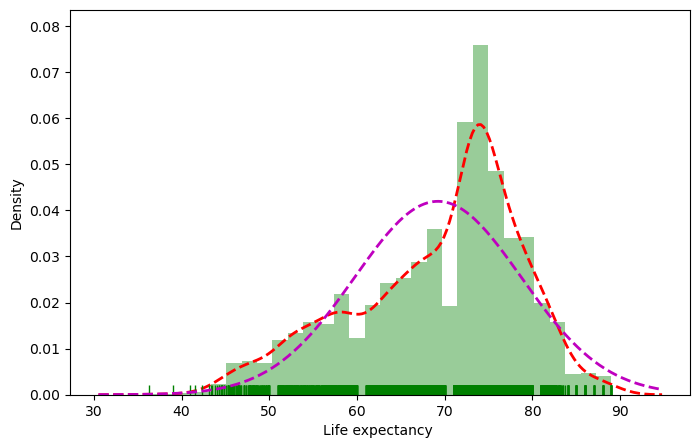

In [11]:
from scipy.stats import norm
plt.figure(figsize = (8,5))
sns.distplot(data['Life expectancy '], color = 'green', fit = norm, bins = 30, rug = True,
            kde_kws={"color": "r",'linewidth':2,"linestyle":"--"},
            fit_kws={"color": "m",'linewidth':2,"linestyle":"--"})

In [12]:
data["Life expectancy "].skew()

-0.6396932035944191

### graphs between regressors and target variable

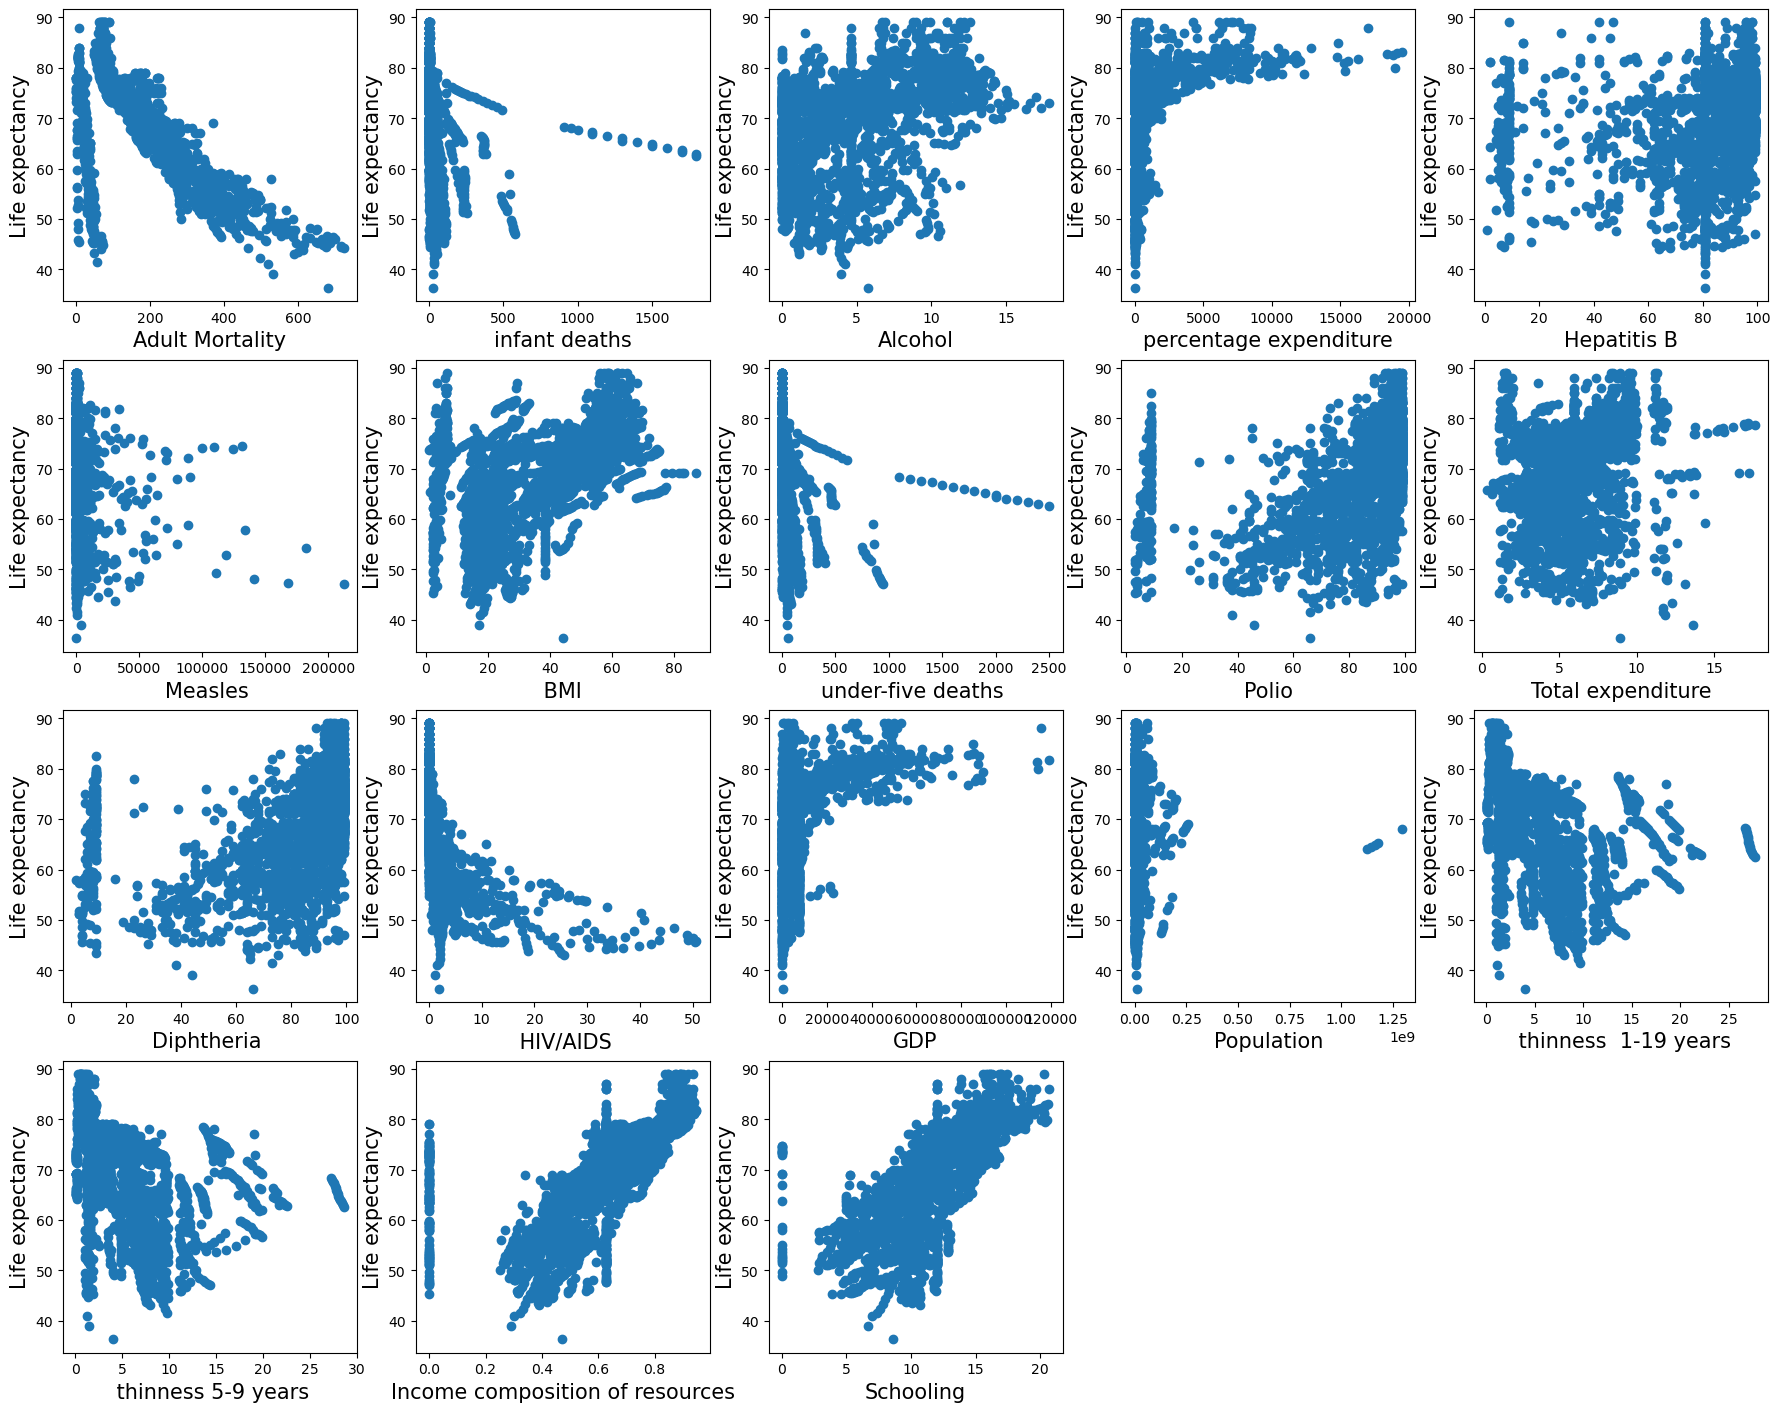

In [13]:
plt.figure(figsize=(22,22),dpi=100)

for index, feature_name in enumerate(data[features]):
    plt.subplot(5,5,index+1)
    plt.scatter(data[feature_name],data['Life expectancy '])
    plt.ylabel('Life expectancy',size=15)
    plt.xlabel(feature_name,size=15)

### From the above plots we can infer that, with the increased availability of vaccines for 'Hepatitis B', 'Polio', ' Diphtheria'...Life expectancy also increased

### Heat map and correlation

<AxesSubplot:>

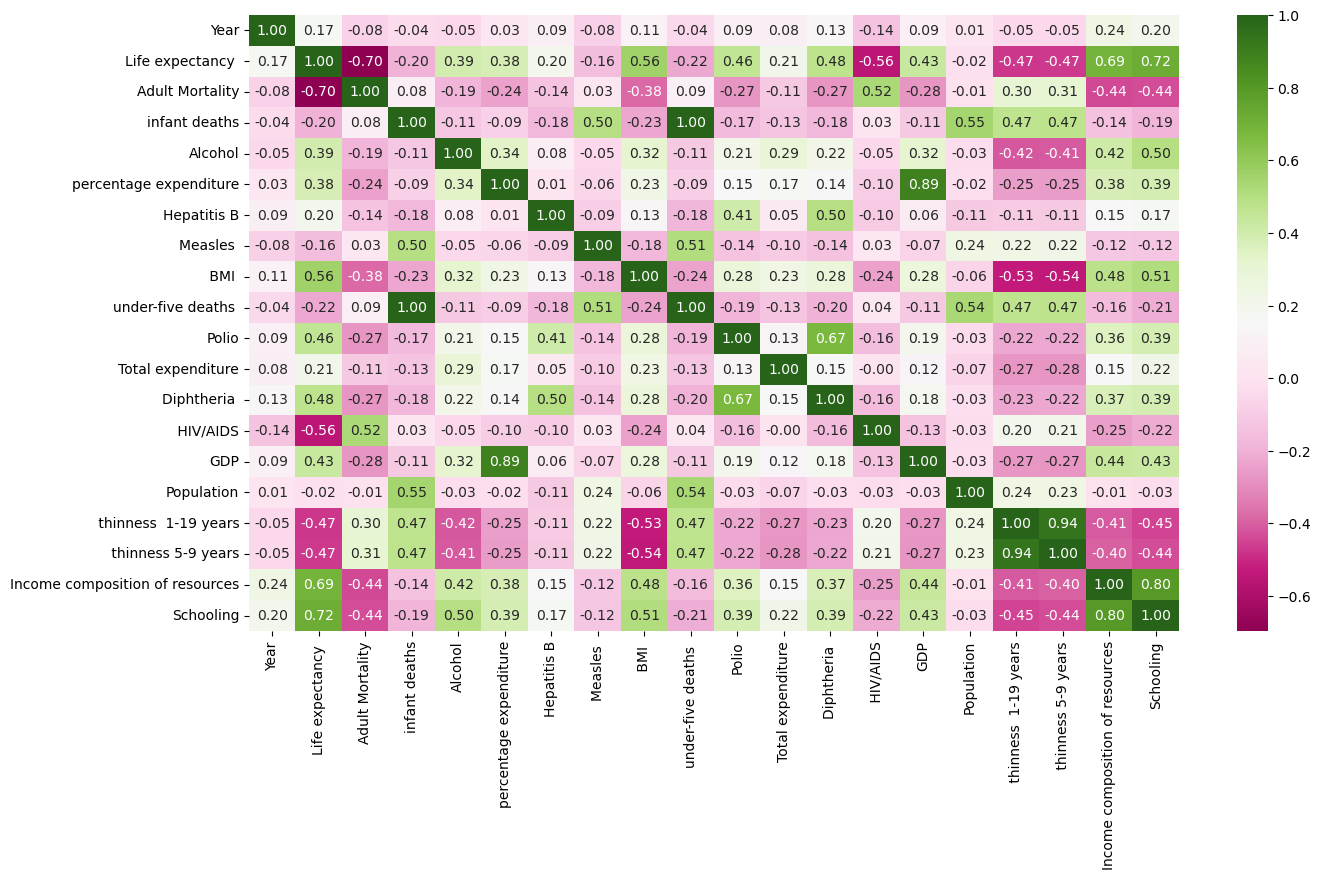

In [14]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'PiYG')

#### from the above we can conclude that 'population' has no impact on 'life expectancy' so the correlation b/w them is -0.02 i.e. ~0..so we can omitt this factor

#### regressor having high correlation(i.e. 'under-five deaths ', 'Schooling', 'GDP', ' thinness  1-19 years') among themselves will be removed before proceeding to train the model.

### Feature Engg

#### Outlier detection

<AxesSubplot:xlabel='Life expectancy '>

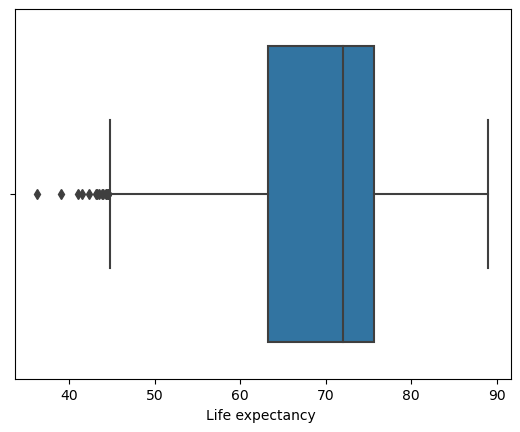

In [15]:
sns.boxplot(x = 'Life expectancy ', data = data)

In [16]:
upper_limit = (75.6 + 1.5*(-63.2+75.6))
lower_limit = (63.2 - 1.5*(-63.2+75.6))

In [17]:
IQR = 75.6-63.2
IQR

12.399999999999991

In [18]:
upper_limit

94.19999999999999

In [19]:
lower_limit

44.600000000000016

#### Treating outliers using capping method

In [20]:
# np.where(true, false)
        # or
# np.where(condition, np.where()) 

In [21]:
data_dup = data.copy()
data_dup["Life expectancy "] = np.where(

            data_dup["Life expectancy "] > upper_limit, # this line is like 'if' condition
            upper_limit,  # if the above 'if' condition is true, then all those values which are > upper_limit, will be replaced by upper_limit
            
            np.where(data_dup["Life expectancy "] < lower_limit,  # this line is like 'elif/if' condition
            lower_limit,  # if the above 'elif/if' condition is true, then all those values which are < lower_limit, will be replaced by lower_limit
            
            data_dup["Life expectancy "]  # this line is like else condition, if the above two conditions are failed, then the value remains as such
            
            )
)

In [22]:
data_dup

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.6,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.6,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<AxesSubplot:xlabel='Life expectancy '>

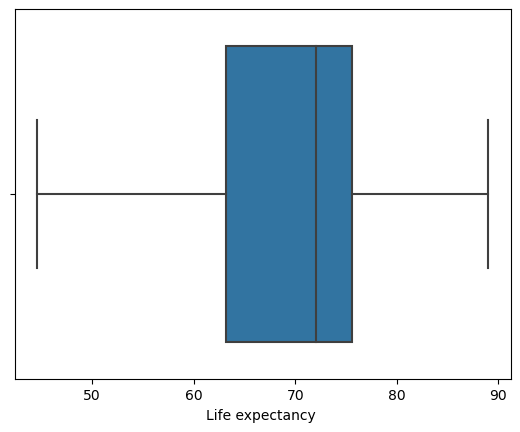

In [23]:
sns.boxplot(x = 'Life expectancy ', data = data_dup)

#### changes in the skewnness of data before and after treatment of outliers

##### via graph

<AxesSubplot:xlabel='Life expectancy ', ylabel='Density'>

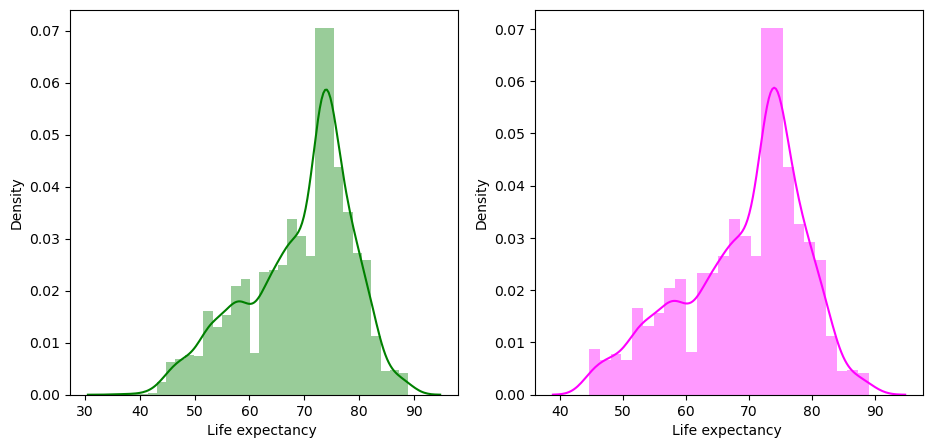

In [24]:
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
sns.distplot(data["Life expectancy "], color = 'green')

plt.subplot(1,2,2)
sns.distplot(data_dup["Life expectancy "], color = 'magenta')

##### via function

In [25]:
print(f"skewness before capping is {data['Life expectancy '].skew()} and after is {data_dup['Life expectancy '].skew()}")

skewness before capping is -0.6396932035944191 and after is -0.623099224940124


### Seggregation of dataset into features and target variables

In [26]:
x = data_dup.drop(columns = ['Year', 'Country', "Status", 'Life expectancy ', 'under-five deaths ', 'Schooling', 'GDP', 'Population', ' thinness  1-19 years' ])
y = data_dup.iloc[:, 3]

In [27]:
x.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 5-9 years,Income composition of resources
0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,17.3,0.479
1,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,17.5,0.476
2,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,17.7,0.470
3,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,18.0,0.463
4,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,18.2,0.454


In [28]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

### seggregation of dataset into training and testing set

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#### checking the skewness of all regressor and target variables before transformation

In [30]:
print(x.skew())
print(y.skew())

Adult Mortality                    1.176371
infant deaths                      9.786963
Alcohol                            0.610026
percentage expenditure             4.652051
Hepatitis B                       -2.142780
Measles                            9.441332
 BMI                              -0.220590
Polio                             -2.104863
Total expenditure                  0.643921
Diphtheria                        -2.079481
 HIV/AIDS                          5.396112
 thinness 5-9 years                1.787788
Income composition of resources   -1.177688
dtype: float64
-0.623099224940124


#### Log transformation of right skewed data AND cube root transformation of left skewed data

In [31]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
trf1 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Adult Mortality', 'infant deaths','percentage expenditure', 'Measles ',' HIV/AIDS', ' thinness 5-9 years']),
                         ('cbrt',FunctionTransformer(np.cbrt),['Income composition of resources','Diphtheria ','Polio','Hepatitis B'])], remainder = 'passthrough')
x_train_transformed_1 = trf1.fit_transform(x_train)
x_test_transformed_1 = trf1.transform(x_test)

In [32]:
# trf2 = ColumnTransformer([('cbrt',FunctionTransformer(np.cbrt),['Income composition of resources','Diphtheria ','Polio','Hepatitis B'])],remainder='passthrough')
# x_train_transformed = trf2.fit_transform(x_train)
# x_test_transformed = trf2.transform(x_test)

### Training the data on Multiple linear Regression(MLR)

In [33]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(x_train_transformed_1,y_train)

LinearRegression()

### Testing the data

In [34]:
y_pred=model.predict(x_test_transformed_1) 

### Performance metrics for MLR

In [35]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

print("R2 Score: ", r2_score(y_test, y_pred))

print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  3.239621880276285
Mean Squared Error:  18.087977322232383
R2 Score:  0.7985535846704757
Root Mean Squared Error:  4.252996275831003


#### Regression equation coefficients and intercept

In [36]:
print("model intercept = ",model.intercept_)
print("model coef = ",model.coef_)

model intercept =  63.314015235789185
model coef =  [-0.87260472 -1.12601856  0.34236266  0.0915162  -6.40572606 -1.02032205
  7.02478987  1.09465005  0.79632838 -0.40053372  0.22657434  0.02907319
  0.1360465 ]


### Ordinary Least squares regression

In [37]:
import statsmodels.api as sm

In [38]:
x_train_transformed_1 = sm.add_constant(x_train_transformed_1)  # this code is added to get the intercept value 'c' of the equation y = mx + c
x_test_transformed_1 = sm.add_constant(x_test_transformed_1)
model2=sm.OLS(y_train,x_train_transformed_1)
results=model2.fit()

In [39]:
results.params   # this command gives the intercept of equation and coefficients

const    63.314015
x1       -0.872605
x2       -1.126019
x3        0.342363
x4        0.091516
x5       -6.405726
x6       -1.020322
x7        7.024790
x8        1.094650
x9        0.796328
x10      -0.400534
x11       0.226574
x12       0.029073
x13       0.136047
dtype: float64

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     785.8
Date:                Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:32:05   Log-Likelihood:                -6643.0
No. Observations:                2350   AIC:                         1.331e+04
Df Residuals:                    2336   BIC:                         1.339e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.3140      1.044     60.623      0.000      61.266      65.362
x1            -0.8726      0.091     -9.598      0.000      -1.051      -0.694
x2            -1.1260      0.077    -14.544      0.000      -1.278      -0.974
x3             0.3424      0.034     10.070      0.000       0.276       0.409
x4             0.0915      0.034      2.702      0.007       0.025       0.158
x5            -6.4057      0.130    -49.197      0.000      -6.661      -6.150
x6            -1.0203      0.163     -6.257      0.000      -1.340      -0.701
x7             7.0248      0.489     14.356      0.000       6.065       7.984
x8             1.0947      0.165      6.621      0.000       0.770       1.419
x9             0.7963      0.159      4.999      0.000       0.484       1.109
x10           -0.4005      0.147     -2.718      0.007      -0.690      -0.112
x11            0.2266      0.026      8.742      0.000       0.176       0.277
x12            0.0291      0.006      5.154      0.000       0.018       0.040
x13            0.1360      0.038      3.584      0.000       0.062       0.210
==============================================================================
Omnibus:                       50.565   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.682
Skew:                          -0.199   Prob(JB):                     3.02e-18
Kurtosis:                       3.816   Cond. No.                         563.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# NEURAL NETWORK REGRESSION

### Data Normalization using Min-Max scaler

In [41]:
from sklearn.preprocessing import MinMaxScaler

nrm = MinMaxScaler()
x_train = nrm.fit_transform(x_train)
x_test = nrm.transform(x_test)

### building the ANN model

In [42]:
from tensorflow.keras import layers, models

model=models.Sequential()

model.add(layers.Dense(64,activation='relu',input_dim = x_train.shape[1]))  # input_dim attribute is passed to connect the input layer with the number of cols in 'x'.

model.add(layers.Dense(64,activation='relu'))
          
model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(1,activation='linear'))          

In [56]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MAE','MSE'])

### Training the ANN model and validating using test data

In [43]:
history=model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
74/74 [==============================] - 2s 8ms/step - loss: 3362.2964 - MAE: 55.0891 - MSE: 3362.2964 - val_loss: 123.0607 - val_MAE: 9.0383 - val_MSE: 123.0607
Epoch 2/100
74/74 [==============================] - 0s 3ms/step - loss: 102.9634 - MAE: 7.4973 - MSE: 102.9634 - val_loss: 71.4184 - val_MAE: 6.2980 - val_MSE: 71.4184
Epoch 3/100
74/74 [==============================] - 0s 3ms/step - loss: 75.8211 - MAE: 6.3566 - MSE: 75.8211 - val_loss: 62.2746 - val_MAE: 5.9111 - val_MSE: 62.2746
Epoch 4/100
74/74 [==============================] - 0s 3ms/step - loss: 64.2421 - MAE: 5.9343 - MSE: 64.2421 - val_loss: 53.6710 - val_MAE: 5.4997 - val_MSE: 53.6710
Epoch 5/100
74/74 [==============================] - 0s 3ms/step - loss: 53.4687 - MAE: 5.4568 - MSE: 53.4687 - val_loss: 45.5068 - val_MAE: 5.0627 - val_MSE: 45.5068
Epoch 6/100
74/74 [==============================] - 0s 3ms/step - loss: 43.7888 - MAE: 5.0137 - MSE: 43.7888 - val_loss: 38.1187 - val_MAE: 4.6050 - val_MS

Epoch 100/100
74/74 [==============================] - 0s 3ms/step - loss: 6.7073 - MAE: 1.8771 - MSE: 6.7073 - val_loss: 7.0724 - val_MAE: 1.8416 - val_MSE: 7.0724


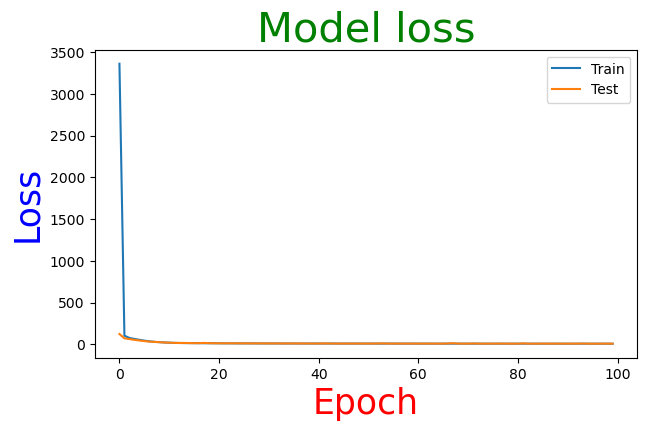

In [44]:
plt.figure(figsize=(7,4),dpi=100)

plt.plot(history.history['MSE'])

plt.plot(history.history['val_MSE'])

plt.title('Model loss',size=30,c='green')

plt.xlabel('Epoch',size=25,c='red')

plt.ylabel('Loss',size=25,c='blue')

plt.legend(['Train','Test'], loc='upper right')

plt.show()

### Predict Life expectancy using model.

In [45]:
test_predictions=model.predict(x_test)

19/19 [==============================] - 0s 2ms/step


In [46]:
test_predictions

array([[76.98841 ],
       [66.47903 ],
       [50.044712],
       [61.515625],
       [55.74461 ],
       [66.653145],
       [71.196945],
       [81.326454],
       [73.78947 ],
       [51.922653],
       [62.84656 ],
       [80.98895 ],
       [74.014656],
       [76.97542 ],
       [64.751526],
       [74.38551 ],
       [56.667316],
       [64.44787 ],
       [70.49849 ],
       [84.15263 ],
       [73.715416],
       [72.96095 ],
       [72.78658 ],
       [81.198906],
       [70.77629 ],
       [61.214054],
       [82.96802 ],
       [71.43604 ],
       [71.85602 ],
       [68.88374 ],
       [73.61486 ],
       [44.716564],
       [76.41805 ],
       [72.7024  ],
       [73.876366],
       [71.57139 ],
       [72.610985],
       [82.5651  ],
       [60.266083],
       [72.245255],
       [59.89775 ],
       [77.64493 ],
       [82.26213 ],
       [74.38397 ],
       [73.94719 ],
       [80.34287 ],
       [58.619183],
       [73.107834],
       [53.694817],
       [75.852   ],


### Evaluating the model

In [47]:
print("Testing data:",model.evaluate(x_test, y_test))

19/19 [==============================] - 0s 2ms/step - loss: 7.0724 - MAE: 1.8416 - MSE: 7.0724
Testing data: [7.072405815124512, 1.8416059017181396, 7.072405815124512]


### Compare with Linear Regression

In [48]:
model_multi=LinearRegression()

model_multi.fit(x_train_transformed_1, y_train)

LinearRegression()

In [49]:
linear_test_prediction=model_multi.predict(x_test_transformed_1)

In [50]:
print('MAE:', mean_absolute_error(linear_test_prediction, y_test))
print('MSE:', mean_squared_error(linear_test_prediction, y_test))

MAE: 3.239621880276288
MSE: 18.087977322232415


### visualization of performance metrics in ANN and MLR

In [51]:
metrics = ['MAE','MSE']
MLR=[2.95, 15.44]
ANN=[1.89, 7.33]

In [52]:
xpos=np.arange(len(metrics))
xpos

array([0, 1])

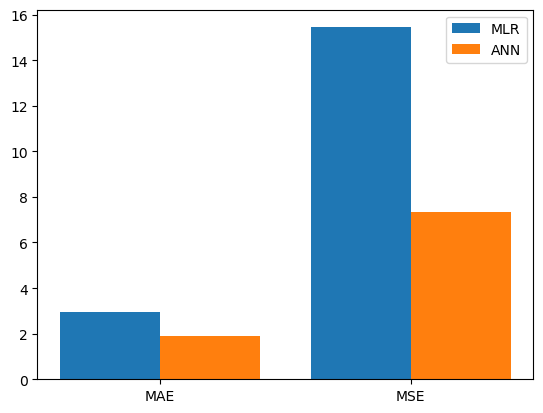

In [53]:
plt.bar(xpos-0.2,MLR,label='MLR',width=0.4)
plt.bar(xpos+0.2,ANN,label='ANN',width=0.4)
plt.xticks(xpos,metrics)
plt.legend()

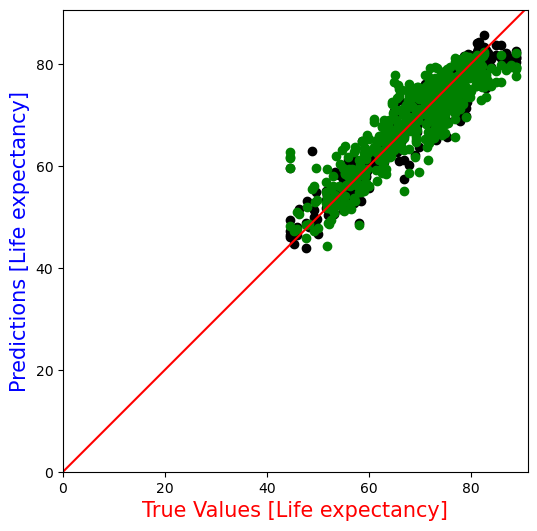

In [54]:
plt.figure(figsize=(10,6),dpi=100)

plt.scatter(y_test,test_predictions,c='black')

plt.scatter(y_test,linear_test_prediction,c='green')

plt.xlabel('True Values [Life expectancy]' , size=15 , c='red')

plt.ylabel('Predictions [Life expectancy]', size=15 , c='blue')

plt.axis('Equal')

plt.axis('Square')

plt.xlim(0,plt.xlim()[1])

plt.ylim(0,plt.ylim()[1])

plt.plot([-100,100],[-100,100],c='red')

plt.show()

Answers to the objectives.

1. Apart from Population all factors effects Life expectancy eitherly positively or negatively.
2. Infant and adult mortality effects life expectancy negatively.
3. Life Expectancy has positive correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
4. the impact of schooling on the lifespan of humans is highly positive.
5. Life Expectancy have positive relationship with drinking alcohol.
6. Population donot have any impact on Life expectancy.
7. The impact of Immunization coverage on life Expectancy is positive.
